In [1]:
print("test")

test


In [2]:
import pandas as pd 
import openpyxl 
import os 
import numpy as np
import glob
import tensorflow as tf
import seaborn as sns

from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

print("ok")

2024-03-06 15:33:40.140832: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ok


In [ ]:
# ความหวาน

sugar = pd.read_csv("ความหวาน.csv")
dataSugar = sugar.iloc[131:250 ,1:2]
print(dataSugar)

In [ ]:
# อ่านไฟล์กระดาษฟอล์ย อ้างอิง 

reference = pd.read_csv("data2000/Dark_1.csv", skiprows=2, names=["wavelength", "data"])
reference

In [ ]:
samples = [] 
# อ่านไฟล์ส้ม
for i in range(30):
    df = pd.read_csv(f"data2000/{i+1}_t.csv", skiprows=2, names=["wavelength", "data"])
    sample_data = df['data'].values / (reference['data'].values + 1)
    sample_data=np.array(sample_data)
    sample_data = (sample_data - np.min(sample_data) /( np.max(sample_data)-np.min(sample_data)))
    samples.append(sample_data)
    
X = np.array(samples)

In [ ]:
directory = os.getcwd() + '/data2000'
csv_files = glob.glob(os.path.join(directory, '*_t.csv'))
filses = pd.read_csv(csv_files[0]).drop(index=0)
wavelength = filses.iloc[:, 0]
# สร้าง DataFrame ที่มี column เริ่มต้นจาก wavelength
table = pd.DataFrame({ 'wavelength': wavelength })

# นำคอลัมน์อื่น ๆ มาต่อกันเรื่อย ๆ
for file in csv_files:
    # อ่านคอลัมน์ที่ต้องการจากไฟล์ CSV
    spectrum = pd.read_csv(file).iloc[:, 1]
    # เพิ่มคอลัมน์ของ spectrum เข้าไปใน DataFrame และใช้ชื่อไฟล์เป็นชื่อคอลัมน์
    table[os.path.basename(file)] = spectrum
print(table)
# บันทึก DataFrame เป็นไฟล์ CSV
table.to_csv('all_files_t.csv', index=False)


In [3]:
dataSam = pd.read_csv('all_files_t.csv')
dataSam

,wavelength,131_t.csv,132_t.csv,133_t.csv,134_t.csv,135_t.csv,136_t.csv,137_t.csv,138_t.csv,139_t.csv,...,241_t.csv,242_t.csv,243_t.csv,244_t.csv,245_t.csv,246_t.csv,247_t.csv,248_t.csv,249_t.csv,250_t.csv
0,340,45.0,32.0,0.0,0.0,49.0,81.0,0.0,0.0,27.0,...,36.0,0.0,12.0,0.0,21.0,7.0,7.0,28.0,0.0,84.0
1,341,31.0,0.0,0.0,0.0,127.0,33.0,0.0,0.0,0.0,...,12.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,5.0,22.0
2,342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,343,103.0,147.0,0.0,133.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,5.0,17.0,49.0
4,344,131.0,0.0,0.0,8.0,0.0,0.0,8.0,0.0,89.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,996,1077.0,1170.0,1320.0,1203.0,1449.0,1746.0,1923.0,1937.0,2410.0,...,495.0,659.0,333.0,789.0,608.0,446.0,548.0,936.0,664.0,664.0
657,997,1169.0,1168.0,1212.0,1095.0,1493.0,1723.0,2022.0,1947.0,2560.0,...,560.0,595.0,477.0,761.0,712.0,463.0,560.0,938.0,599.0,705.0
658,998,1286.0,1424.0,1457.0,1375.0,1831.0,2102.0,2276.0,2230.0,2733.0,...,714.0,814.0,567.0,980.0,882.0,602.0,729.0,1063.0,730.0,896.0
659,999,1163.0,1258.0,1417.0,1301.0,1737.0,1969.0,2234.0,2183.0,2618.0,...,654.0,774.0,564.0,867.0,904.0,594.0,713.0,1001.0,728.0,780.0


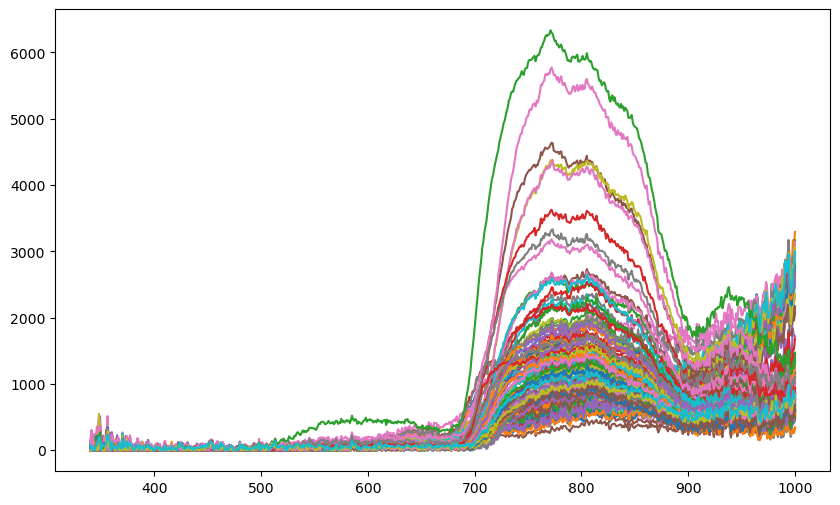

In [4]:
plt.figure(figsize=(10, 6))

# Plot actual sales
plt.plot(dataSam['wavelength'], dataSam.iloc[:, 1:])

# # Plot moving average
# plt.plot(df_sales['Month'], df_sales['Moving Average'], label='Moving Average', linestyle='--', color='red')

# # Customize plot
# plt.title('Monthly Sales and Moving Average')
# plt.xlabel('Month')
# plt.ylabel('Sales')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)

plt.show()


In [ ]:
y = dataSam.iloc[:, 1:]
# dataset.shape
y = y.values.astype(int)


In [ ]:
y

In [ ]:
x = dataSam['wavelength']
x.values

In [5]:
x = dataSam['wavelength'].values
y = dataSam.iloc[:, 1:].values.astype(int)

In [6]:
x

array([ 340,  341,  342,  343,  344,  345,  346,  347,  348,  349,  350,
        351,  352,  353,  354,  355,  356,  357,  358,  359,  360,  361,
        362,  363,  364,  365,  366,  367,  368,  369,  370,  371,  372,
        373,  374,  375,  376,  377,  378,  379,  380,  381,  382,  383,
        384,  385,  386,  387,  388,  389,  390,  391,  392,  393,  394,
        395,  396,  397,  398,  399,  400,  401,  402,  403,  404,  405,
        406,  407,  408,  409,  410,  411,  412,  413,  414,  415,  416,
        417,  418,  419,  420,  421,  422,  423,  424,  425,  426,  427,
        428,  429,  430,  431,  432,  433,  434,  435,  436,  437,  438,
        439,  440,  441,  442,  443,  444,  445,  446,  447,  448,  449,
        450,  451,  452,  453,  454,  455,  456,  457,  458,  459,  460,
        461,  462,  463,  464,  465,  466,  467,  468,  469,  470,  471,
        472,  473,  474,  475,  476,  477,  478,  479,  480,  481,  482,
        483,  484,  485,  486,  487,  488,  489,  4

In [7]:
y

array([[  45,   32,    0, ...,   28,    0,   84],
       [  31,    0,    0, ...,   60,    5,   22],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [1286, 1424, 1457, ..., 1063,  730,  896],
       [1163, 1258, 1417, ..., 1001,  728,  780],
       [1277, 1430, 1441, ..., 1111,  831,  823]])

In [8]:

# แบ่งข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# ตอนนี้ x_train, x_test, y_train, y_test มีข้อมูลที่ถูกแบ่งออกเป็นชุดฝึกอบรมและชุดทดสอบ
# โดยมีขนาดของชุดทดสอบเป็น 20% ของข้อมูลทั้งหมด

# แปลง numpy array เป็น TensorFlow Dataset สำหรับชุดฝึกอบรมและชุดทดสอบ
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).shuffle(buffer_size=len(x_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)  # ไม่จำเป็นต้อง shuffle ชุดทดสอบ
dataset = tf.data.Dataset.from_tensor_slices(({"aaa": x}, y))
dataset = dataset.batch(32).shuffle(buffer_size=len(x))

## เข้า tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# สร้างโมเดลโดยกำหนดชื่ออินพุต
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name='aaa'),  # ใช้ชื่อ 'input' ตรงกับข้อมูล
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='linear')
])

# ตรวจสอบโครงสร้างโมเดล
model.summary()

# ตั้งค่าการคอมไพล์โมเดล
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mse')  # Example for a regression problem

# model.fit({'input': x_train}, y_train, epochs=10)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name='aaa'),
    layers.Dense(128, activation='relu'),  # เพิ่มจำนวนหน่วยในชั้นแรก
    layers.Dense(64, activation='relu'),   # ชั้นซ่อนเพิ่มเติม
    layers.Dropout(0.5),                   # เพิ่ม dropout เพื่อป้องกันการ overfitting
    layers.Dense(y_train.shape[1], activation='linear')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 120)               7800      
                                                                 
Total params: 16312 (63.72 KB)
Trainable params: 16312 (63.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input_layer = tf.keras.layers.Input(shape=(1,), name='aaa')


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(({"aaa": x}, y))


In [ ]:
model.fit({'aaa': x_train}, y_train, epochs=3000)